In [20]:
import pandas as pd

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from imblearn.under_sampling import InstanceHardnessThreshold

from yellowbrick.model_selection import FeatureImportances

import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('../data/cleaned_data_2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110521 entries, 0 to 110520
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Gender                110521 non-null  int64
 1   Scholarship           110521 non-null  int64
 2   Hypertension          110521 non-null  int64
 3   Diabetes              110521 non-null  int64
 4   Alcoholism            110521 non-null  int64
 5   Handicap              110521 non-null  int64
 6   SMS_received          110521 non-null  int64
 7   Show                  110521 non-null  int64
 8   ScheduledHour         110521 non-null  int64
 9   ScheduledMonth        110521 non-null  int64
 10  AppointmentMonth      110521 non-null  int64
 11  ScheduledDayOfWeek    110521 non-null  int64
 12  AppointmentDayOfWeek  110521 non-null  int64
 13  AgeGroupInt           110521 non-null  int64
 14  NeighbourhoodInt      110521 non-null  int64
 15  AwaitingTimeGroup     110521 non-n

In [2]:
X = df.drop(['Show'], axis=1)
y = df['Show']

iht = InstanceHardnessThreshold(random_state=42)
X_res, y_res = iht.fit_resample(X, y)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

In [21]:
nb_clf = GaussianNB()

nb_clf.fit(X_train, y_train)

nb_pred = nb_clf.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, nb_pred))
print('F1: ', f1_score(y_test, nb_pred))
print('Recall: ', recall_score(y_test, nb_pred))
print('Precision: ', precision_score(y_test, nb_pred))

Accuracy:  0.8254989399809928
F1:  0.8431153466973381
Recall:  0.9215517241379311
Precision:  0.7769836462749848


In [22]:
lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)

lr_pred = lr_clf.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, lr_pred))
print('F1: ', f1_score(y_test, lr_pred))
print('Recall: ', recall_score(y_test, lr_pred))
print('Precision: ', precision_score(y_test, lr_pred))

Accuracy:  0.8407778346370348
F1:  0.8582400416558188
Recall:  0.9472701149425288
Precision:  0.7845073774393146


/opt/miniconda3/envs/lmappshow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
svc_clf = SVC()

svc_clf.fit(X_train, y_train)

svc_pred = svc_clf.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, svc_pred))
print('F1: ', f1_score(y_test, svc_pred))
print('Recall: ', recall_score(y_test, svc_pred))
print('Precision: ', precision_score(y_test, svc_pred))

Accuracy:  0.832297682579136
F1:  0.8534934218929622
Recall:  0.9600574712643678
Precision:  0.7682225799034261


In [16]:
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 100, 100),
    max_iter=500,
    alpha=0.0001,
    solver='sgd',
    random_state=21,
    tol=0.000000001
)

mlp.fit(X_train, y_train)
predictions = mlp.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, predictions))
print("F1: ", f1_score(y_test, predictions))
print("Recall: ", recall_score(y_test, predictions))
print("Precision: ", precision_score(y_test, predictions))

Iteration 1, loss = 0.61313336
Iteration 2, loss = 0.51214836
Iteration 3, loss = 0.45809827
Iteration 4, loss = 0.44194501
Iteration 5, loss = 0.42358408
Iteration 6, loss = 0.41643517
Iteration 7, loss = 0.40255437
Iteration 8, loss = 0.38640202
Iteration 9, loss = 0.38184181
Iteration 10, loss = 0.36622233
Iteration 11, loss = 0.35288361
Iteration 12, loss = 0.34521961
Iteration 13, loss = 0.33702138
Iteration 14, loss = 0.32821020
Iteration 15, loss = 0.32238675
Iteration 16, loss = 0.31797645
Iteration 17, loss = 0.31621142
Iteration 18, loss = 0.31407316
Iteration 19, loss = 0.30904955
Iteration 20, loss = 0.30608742
Iteration 21, loss = 0.30332689
Iteration 22, loss = 0.30320403
Iteration 23, loss = 0.30440081
Iteration 24, loss = 0.30037921
Iteration 25, loss = 0.29798410
Iteration 26, loss = 0.29906115
Iteration 27, loss = 0.29527914
Iteration 28, loss = 0.29511398
Iteration 29, loss = 0.29471618
Iteration 30, loss = 0.29379796
Iteration 31, loss = 0.29237148
Iteration 32, los

In [27]:
kmeans_cls = KMeans(n_clusters=2, random_state=42)

kmeans_cls.fit(X_train, y_train)

kmeans_pred = kmeans_cls.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, kmeans_pred))
print('F1: ', f1_score(y_test, kmeans_pred))
print('Recall: ', recall_score(y_test, kmeans_pred))
print('Precision: ', precision_score(y_test, kmeans_pred))

Accuracy:  0.46860150595803785
F1:  0.371248161923709
Recall:  0.30833333333333335
Precision:  0.4664203434036079


/opt/miniconda3/envs/lmappshow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
knn_cls = KNeighborsClassifier(n_neighbors=5)
knn_cls.fit(X_train, y_train)

knn_pred = knn_cls.predict(X_test)

print('Accuracy Score: ', accuracy_score(y_test, knn_pred))
print('F1 Score: ', f1_score(y_test, knn_pred))
print('Recall Score: ', recall_score(y_test, knn_pred))
print('Precision Score: ', precision_score(y_test, knn_pred))

Accuracy Score:  0.8513780247094086
F1 Score:  0.867080745341615
Recall Score:  0.9527298850574712
Precision Score:  0.7955608878224355


In [26]:
dt_cls = DecisionTreeClassifier(random_state=42)
dt_cls.fit(X_train, y_train)

dt_pred = dt_cls.predict(X_test)

print('Accuracy Score: ', accuracy_score(y_test, dt_pred))
print('F1 Score: ', f1_score(y_test, dt_pred))
print('Recall Score: ', recall_score(y_test, dt_pred))
print('Precision Score: ', precision_score(y_test, dt_pred))

Accuracy Score:  0.9056948607354339
F1 Score:  0.9088854357960163
Recall Score:  0.9244252873563218
Precision Score:  0.8938594053903862


/opt/miniconda3/envs/lmappshow/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


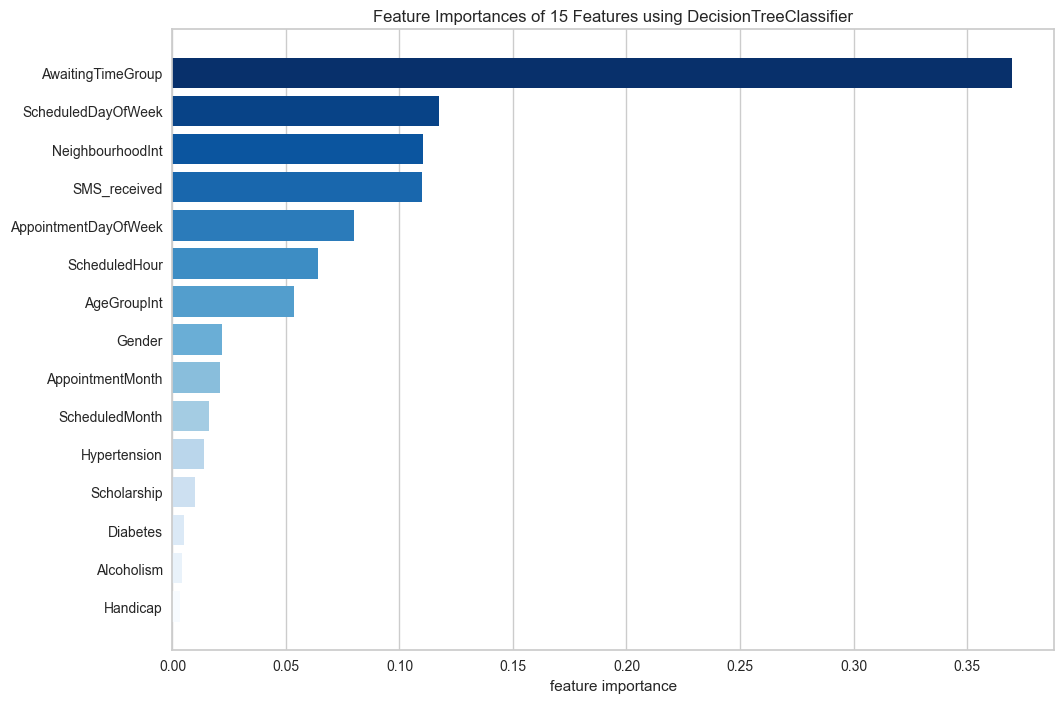

<Axes: title={'center': 'Feature Importances of 15 Features using DecisionTreeClassifier'}, xlabel='feature importance'>

In [9]:
viz = FeatureImportances(
    dt_cls,
    size=(1080, 720),
    max_num_features=10,
    relative=False,
    colormap='Blues',
)
viz.fit(X_train, y_train)
viz.show()

In [35]:
models_results = pd.DataFrame({
    'Model':
        ['KNN', 'Logistic Regression', 'Support Vector Machines', 'Naive Bayes', 'Decision Tree', 'K-Means', 'Neural Network'],
    'Accuracy score': 
        [accuracy_score(y_test, knn_pred), accuracy_score(y_test, lr_pred), accuracy_score(y_test, svc_pred), accuracy_score(y_test, nb_pred), accuracy_score(y_test, dt_pred), accuracy_score(y_test, kmeans_pred), accuracy_score(y_test, predictions)]})

models_results = models_results.sort_values(by='Accuracy score', ascending=False)

models_results

,Model,Accuracy score
6,Neural Network,0.912713
4,Decision Tree,0.905695
0,KNN,0.851378
1,Logistic Regression,0.840778
2,Support Vector Machines,0.832298
3,Naive Bayes,0.825499
5,K-Means,0.468602


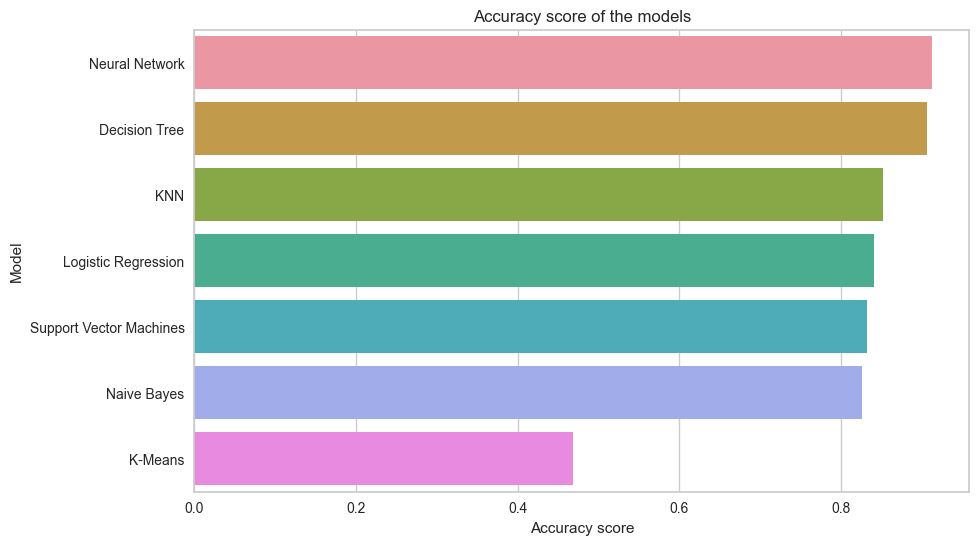

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy score', y='Model', data=models_results)
plt.title('Accuracy score of the models')
plt.show()
